# Variance: Determining Significance

Quite often we want compare one set of data to another, and ask, “Is a new set of data fundamentally different than another set?”

 <br>

This might be because we want to know if a new product (a batch of paint, or brake pads, or baseball bats) matches a defined specification.  Or maybe we want to know if conditions in a system (a flow velocity in stream, or a manufacturing assembly line) have genuinely changed.

<br>

<center>
<img src = https://github.com/MAugspurger/Exper_Eng/raw/main/1_Measurement_and_Uncertainty/Images/absorbent.PNG width = 300>
</center>

<br>

Variance makes this difficult.  Let's say you are measuring the mean flow velocity.  You take ten samples at one time, and then an hour later you take ten more measurements, and find that the mean velocity has increased by $0.13 m/s$. Has that stream velocity genuinely increased?  Or is the difference just a matter of random variation in the test?


## Comparing One Data Point with a Data Set: Finding Outliers

To answer this, we use some of the statistical tools we've been learning to try to determine whether the two sample data sets are different.  We'll look at two ways of doing this, but in both, we'll use a similar process:

<br>

1. Set an “acceptable difference” that creates a bounds of what variance might reasonably happen by chance.


2. Define the variance between the two sample data sets


3. Checks whether the actual variance is larger than the acceptable variance: if it is, then the differences cannot be assigned to random chance.

<br>

We'll start with the simpler of the two processes: determining whether a single data point is an "outlier" from a large data set.  Watch the video and answer the quetions.


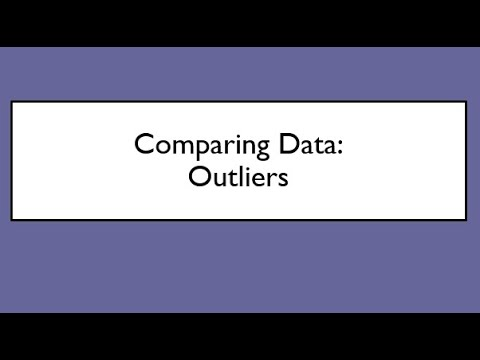

In [1]:
# @title {display-mode: "form"}
## @markdown Run this cell to watch this video, and answer the questions below.
from IPython.display import YouTubeVideo

def display_video(video_id, W=400, H=300, fs=1):
    video = YouTubeVideo(id=video_id, width=W, height=H, fs=fs, rel=0)
    display(video)
    #print(f'Video available at https://youtube.com/watch?v={video.id}')
    return

video_id = 'lYYDvJ57Vpo'
display_video(video_id, W=600, H=450)

<br><br>

---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷<font size = 5> Active Learning Questions </font> 🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br>


In [2]:
# Importing support code
# @title
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name
home = 'https://github.com/MAugspurger/Exper_Eng/raw/main/1_Measurement_and_Uncertainty/Embedded_Qs/'
efile = '2_e_Embedded_Qs'

#@title #======================================= { run: "auto", form-width: "50%", display-mode: "form" }
#@markdown #####*Multiple Choice*:  <br><br> Choose the correct letter.  <br><br>
data = display_multC(efile,home,0)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

When we compare a data set to an outlier to a data set, we have to set an "acceptable variance".  How do we do this?

A) We decide how many standard deviations away from the mean value a point must be in order declare it "not just a result of random chance"
B) We decide the percentage error that is acceptable between the single point and the mean value
C) We decide the absolute error that is acceptable between the single point and the mean value
D) We find the z-score for the single data point


In [3]:
#@title #======================================= { run: "auto", form-width: "50%", display-mode: "form" }
#@markdown #####*Multiple Choice*:  <br><br> Choose the correct letter.  <br><br>
data = display_multC(efile,home,1)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

Imagine you measure the torque on motor shaft, and find it has a mean value of 123.0 Nm with a standard deviation of 6.0 Nm.   One of the 8 readings has a value of 108.0 Nm.  What is the z-score of this data point?  Estimate this in your head before you use a calculator.

A) 0.4
B) 0.6
C) 0.8
D) 1.5
E) 2.5
F) 3.5


In [4]:
#@title #======================================= {form-width: "50%", display-mode: "form" }
#@markdown ##### *Quantitative Question* <br><br>Enter your answer, and run the cell to check your answer.  <br><br>
data = display_Quant(efile,home,2)
answer = None #@param {type:"number"}
check_Quant(data,answer)

Imagine you measure the torque on motor shaft, and find it has a mean value of 123.0 Nm with a standard deviation of 6.0 Nm.   One of the 8 readings has a value of 108.0 Nm. Use Chauvenet's criterion to determine the acceptable variance z_acc.



In [10]:
#@title #======================================= { run: "auto", form-width: "50%", display-mode: "form" }
#@markdown #####*True or False* <br><br>

answer = "True" # @param ["", "True", "False"]
data = display_TF(efile,home,answer,3)
check_TF(data,answer)

Imagine you measure the torque on motor shaft, and find it has a mean value of 123.0 Nm with a standard deviation of 6.0 Nm.   One of the 8 readings has a value of 108.0 Nm.   True or False: This data point is an outlier.


Correct! This statement is true: The z_score for the data point is larger than the acceptable variance z_acc.  So the point is an outlier, and should be removed from the data set.



---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br><br><br>



## Comparing Data Sets: Using a T-test

We often want to test one data set is qualitatively different from another data set.

<br>

Imagine you are the manager of a ball bearing factory, and you sample a newly manufactured batch of bearings.

<br>

<center>
<img src = https://github.com/MAugspurger/Exper_Eng/raw/main/1_Measurement_and_Uncertainty/Images/bearings.PNG width = 300>
</center>

<br>


You measure 16 ball bearings and they average $12.0 mm$ in diameter with $\sigma = 0.9 mm$.   Yesterday, you measured 25 bearings, and found the diameter of this type of bearing to be $11.5 \pm 0.3 mm$.    Is it reasonable to assume that the manufacturing process has been altered?

<br>


A T-test uses statistics to determine whether the diffence between two data sets is *statistically significant*.  Is the difference between the two data sets a result of random chance or a fundamental difference?  

<br>

To answer that question, it follows the same process that we used for outliers:

1. Set an “acceptable difference” that creates a bounds of what variance might reasonably happen by chance.


2. Define the variance between the two sample data sets


3. Checks whether the actual variance is larger than the acceptable variance: if it is, then the differences cannot be assigned to random chance.

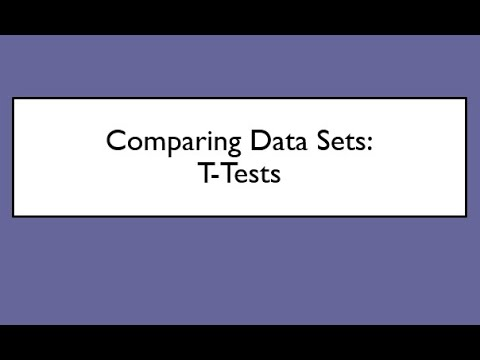

In [6]:
# @title {display-mode: "form"}
## @markdown Run this cell to watch this video, and answer the questions below.
from IPython.display import YouTubeVideo

def display_video(video_id, W=400, H=300, fs=1):
    video = YouTubeVideo(id=video_id, width=W, height=H, fs=fs, rel=0)
    display(video)
    #print(f'Video available at https://youtube.com/watch?v={video.id}')
    return

video_id = 'HKMxZpsNk9U'
display_video(video_id, W=600, H=450)

<br><br>

---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷<font size = 5> Active Learning Questions </font> 🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br>


<center>
<img src = https://github.com/MAugspurger/Exper_Eng/raw/main/1_Measurement_and_Uncertainty/Images/trooper.PNG width = 400>
</center>

<br>

You manufacture laser blasters for storm troopers, and want to ensure that they are suitably inaccurate.  On one day you test a set of 12 blasters, and find they miss their target by 1.23 m on average, with a standard deviation of 0.21 m.  Great!  But the next day you test 9 blasters, and the inaccuracy is only 0.78 m with a standard deviation of 0.31 m.  

<br>

Answer the questions below to determine if something is wrong with the manufacturing process or if the difference between the two sets is just a matter of random chance.

In [11]:
#@title #======================================= {form-width: "50%", display-mode: "form" }
#@markdown ##### *Quantitative Question* <br><br>Enter your answer, and run the cell to check your answer.  <br><br>
data = display_Quant(efile,home,4)
answer = None #@param {type:"number"}
check_Quant(data,answer)

What is t_acc with an alpha = 0.5?



In [12]:
#@title #======================================= {form-width: "50%", display-mode: "form" }
#@markdown ##### *Quantitative Question* <br><br>Enter your answer, and run the cell to check your answer.  <br><br>
data = display_Quant(efile,home,5)
answer = None #@param {type:"number"}
check_Quant(data,answer)

 What is the combined SDM for these data sets?



In [13]:
#@title #======================================= {form-width: "50%", display-mode: "form" }
#@markdown ##### *Quantitative Question* <br><br>Enter your answer, and run the cell to check your answer.  <br><br>
data = display_Quant(efile,home,6)
answer = None #@param {type:"number"}
check_Quant(data,answer)

What is the t-score for these two data sets?



In [14]:
#@title #======================================= { run: "auto", form-width: "50%", display-mode: "form" }
#@markdown #####*Multiple Choice*:  <br><br> Choose the correct letter.  <br><br>
data = display_multC(efile,home,7)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

Knowing t_acc and t_0, what can we say about these data sets?

A) We are 95% confident that the difference between the two sets is a result of random chance
B) We are 95% confident that the difference between the two sets is not a result of random chance
C) We are not 95% confident that the difference is a result of random chance


---
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

---

<br><br><br>

